<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Test Uniform, Default and Xavier Uniform Initialization on  MNIST Dataset With tanh activation</font></h1> 


# Table of Contents
In this lab, you will test Pytroch Default Initialization, Xavier Initialization and Uniform Initialization on the MNIST dataset. 

<div class="alert alert-block alert-info" style="margin-top: 20px">

<li><a href="#ref1">Neural Network Module and Training Function   </a></li>
<li><a href="#ref2"> Prepare Data </a></li>
<li><a href="#ref3">Define Several Neural Network, Criterion function, Optimizer</a></li>
<li><a href="#ref4">Test Uniform, Default and Xavier Uniform Initialization </a></li>
<li><a href="#ref4">Analyse Results</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

define the neural network module or class Xavier Initialization

In [2]:
class Net_Xavier(nn.Module):
    def __init__(self,Layers):
        super(Net_Xavier,self).__init__()
        self.hidden = nn.ModuleList()

        for input_size,output_size in zip(Layers,Layers[1:]):
            linear=nn.Linear(input_size,output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(nn.Linear(input_size,output_size))
            
    def forward(self,x):
        L=len(self.hidden)
        for (l,linear_transform)  in zip(range(L),self.hidden):
            if l<L-1:
                x =F.tanh(linear_transform (x))
           
            else:
                x =linear_transform (x)
        
        return x


Class or Neral Network with Uniform Initialization

In [3]:
class Net_Uniform(nn.Module):
    def __init__(self,Layers):
        super(Net_Uniform,self).__init__()
        self.hidden = nn.ModuleList()

        for input_size,output_size in zip(Layers,Layers[1:]):
            linear=nn.Linear(input_size,output_size)
            linear.weight.data.uniform_(0, 1)
            #inear.weight.data.
            self.hidden.append(linear)
        
    def forward(self,x):
        L=len(self.hidden)
        for (l,linear_transform)  in zip(range(L),self.hidden):
            if l<L-1:
                x =F.tanh(linear_transform (x))
           
            else:
                x =linear_transform (x)
        
        return x

Class or Neral Network with Pytroch Default Initialization

In [4]:
class Net(nn.Module):
    def __init__(self,Layers):
        super(Net,self).__init__()
        self.hidden = nn.ModuleList()

        for input_size,output_size in zip(Layers,Layers[1:]):
            linear=nn.Linear(input_size,output_size)
            
            #inear.weight.data.
            self.hidden.append(linear)
        
    def forward(self,x):
        L=len(self.hidden)
        for (l,linear_transform)  in zip(range(L),self.hidden):
            if l<L-1:
                x =F.tanh(linear_transform (x))
           
            else:
                x =linear_transform (x)
        
        return x

define a function to  train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 

In [15]:
def train(model,criterion, train_loader,validation_loader, optimizer, epochs=100):
    i=0
    useful_stuff={'training_loss':[],'validation_accuracy':[]}  
    
    #n_epochs
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):

            #clear gradient 
            optimizer.zero_grad()
            #make a prediction logits 
            z=model(x.view(-1,28*28))
            # calculate loss 
            loss=criterion(z,y)
    
            # calculate gradients of parameters 
            loss.backward()
            # update parameters 
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct=0
        for x, y in validation_loader:
            #perform a prediction on the validation  data  
            yhat=model(x.view(-1,28*28))
            
            _,lable=torch.max(yhat,1)
            correct+=(lable==y).sum().item()
 
    
        accuracy=100*(correct/len(validation_dataset))
   
        useful_stuff['validation_accuracy'].append(accuracy)
    
        if epoch%3==0:
            print(epoch)
    
    return useful_stuff

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [6]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


Load the testing dataset by setting the parameters train  <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [7]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

create the criterion function  

In [8]:
criterion=nn.CrossEntropyLoss()

create the training-data loader and the validation-data loader object 

In [9]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

<a id="ref3"></a>
<h2 align=center>Define Neural Network, Criterion function, Optimizer and Train the  Model  </h2> 

create the criterion function  

In [10]:
criterion=nn.CrossEntropyLoss()

create  the model with 100 hidden layers  

In [11]:
input_dim=28*28

output_dim=10

layers=[input_dim,100,10,100,10,100,output_dim]
epochs=15

print the model parameters 

<a id="ref4"></a>
<h2 align=center>Test Pytroch Default Initialization,Xavier Initialization,Uniform Initialization  </h2> 

train the network using Pytroch Default Initialization

In [16]:
model=Net(layers)

learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=epochs)

0
3
6
9
12


train the network using Xavier Initialization function

In [17]:
model_Xavier=Net_Xavier(layers)
optimizer=torch.optim.SGD(model_Xavier.parameters(),lr=learning_rate)
training_results_Xavier=train(model_Xavier,criterion, train_loader,validation_loader, optimizer, epochs=epochs)

0
3
6
9
12


train the network using Uniform Initialization

In [18]:
model_Uniform=Net_Uniform(layers)
optimizer=torch.optim.SGD(model_Uniform.parameters(),lr=learning_rate)
training_results_Uniform=train(model_Uniform,criterion, train_loader,validation_loader, optimizer, epochs=epochs)

0
3
6
9
12


<a id="ref5"></a>
<h2 align=center>Analyse Results </h2> 

compare the training loss for each initialization

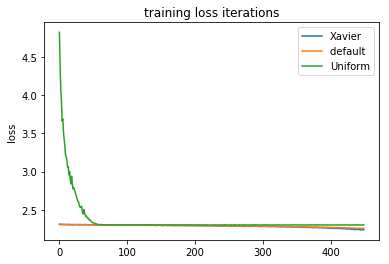

In [19]:
plt.plot(training_results_Xavier['training_loss'],label='Xavier')
plt.plot(training_results['training_loss'],label='default ')
plt.plot(training_results_Uniform['training_loss'],label='Uniform')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

compare the validation loss for each model  

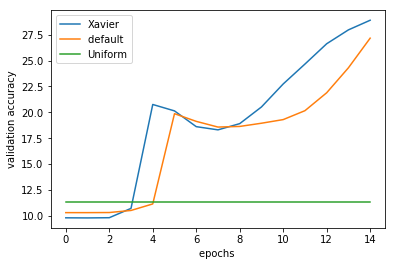

In [20]:
plt.plot(training_results_Xavier['validation_accuracy'],label='Xavier')
plt.plot(training_results['validation_accuracy'],label='default ')
plt.plot(training_results_Uniform['validation_accuracy'],label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) 

  <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).